## Import packages and modules

In [1]:
from models.tda_models import TDA_PI34_Model, TDA_PI42_Model, VECTOR_STITCHING_PI_Model_34, VECTOR_STITCHING_PI_Model_42
from models.raw_models import Raw_Model, Dummy_Model
from tda_pipelines import *


## Fetch dataset, prepare training and testing sets, generate distorted sets

In [2]:
# fetch data, prepare for pipeline and test models

from sklearn.datasets import fetch_openml 
import numpy as np
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(f"X shape: {X.shape}, y shape: {y.shape}")
train_size, test_size = 1000, 300 # Reshape to (n_samples, n_pixels_x, n_pixels_y) 
X = X.reshape((-1, 28, 28)) 
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=666 ) 
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}") 
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# mnist comes with string labels, we need to convert them to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)


X shape: (70000, 784), y shape: (70000,)
X_train shape: (1000, 28, 28), y_train shape: (1000,)
X_test shape: (300, 28, 28), y_test shape: (300,)


Text(0.5, 1.0, 'Noisy Image with Random Noise')

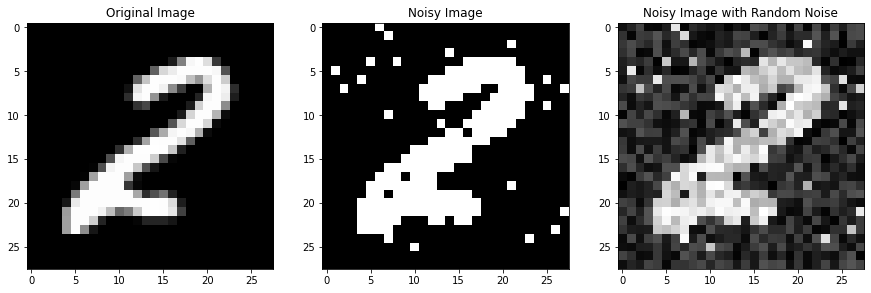

In [14]:
# distort X_train and X_test a little bit not using giotto
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.util import random_noise
X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)

# generate random noise matrix of size X_train_noisy.shape and X_test_noisy.shape but without original image

X_train_noisy_random = np.random.rand(*X_train_noisy.shape)
X_test_noisy_random = np.random.rand(*X_test_noisy.shape)

# for each image in X_train_noisy and X_test_noisy, we will add the random noise matrix to the image

X_train_noisy_random = X_train_noisy + X_train_noisy_random
X_test_noisy_random = X_test_noisy + 0.5*X_test_noisy_random

# plot the original image, the noisy image and the noisy image with random noise

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X_test[5], cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(X_test_noisy[5], cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(X_test_noisy_random[5], cmap="gray")
ax[2].set_title("Noisy Image with Random Noise")


## Load TDA and Vector-stitching pipelines 

In [4]:
# load pipelines 

tda_pipeline_34 = TDA_PI34_Pipeline()
tda_pipeline_42 = TDA_PI42_Pipeline()
vector_stitching_pipeline_34, tda_union_34 = VECTOR_STITCHING_PI_Pipeline_34()
vector_stitching_pipeline_42, tda_union_42 = VECTOR_STITCHING_PI_Pipeline_42()


## Transform raw data to persistance images and stitched RAW-PI images

In [5]:
# clean data

X_train_clean_tda_34 = tda_pipeline_34.fit_transform(X_train)
X_test_clean_tda_34 = tda_pipeline_34.transform(X_test)
X_train_clean_tda_42 = tda_pipeline_42.fit_transform(X_train)
X_test_clean_tda_42 = tda_pipeline_42.transform(X_test)

# distorted data
X_train_noisy_tda_34 = tda_pipeline_34.fit_transform(X_train_noisy_random)
X_test_noisy_tda_34 = tda_pipeline_34.transform(X_test_noisy_random)
X_train_noisy_tda_42 = tda_pipeline_42.fit_transform(X_train_noisy_random)
X_test_noisy_tda_42 = tda_pipeline_42.transform(X_test_noisy_random)


In [6]:

#important for initializing Binarizer
#X_training = tda_union.fit(X_train)

#clean data
X_train_clean_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train)
X_test_clean_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test)
X_train_clean_vector_stitching_42 = vector_stitching_pipeline_42.fit_transform(X_train)
X_test_clean_vector_stitching_42 = vector_stitching_pipeline_42.transform(X_test)

# distorted data
X_train_noisy_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train_noisy_random)
X_test_noisy_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test_noisy_random)
X_train_noisy_vector_stitching_42 = vector_stitching_pipeline_42.fit_transform(X_train_noisy_random)
X_test_noisy_vector_stitching_42 = vector_stitching_pipeline_42.transform(X_test_noisy_random)


In [7]:
# this needs to be integrated into pipeline, transposing the data to fit the input shape of the model

# normal tda
X_train_clean_tda_good_34 = np.transpose(X_train_clean_tda_34, (0, 3, 2, 1))
X_test_clean_tda_good_34 = np.transpose(X_test_clean_tda_34, (0, 3, 2, 1))

X_train_noisy_tda_good_34 = np.transpose(X_train_noisy_tda_34, (0, 3, 2, 1))
X_test_noisy_tda_good_34 = np.transpose(X_test_noisy_tda_34, (0, 3, 2, 1))

X_train_clean_tda_good_42 = np.transpose(X_train_clean_tda_42, (0, 3, 2, 1))
X_test_clean_tda_good_42 = np.transpose(X_test_clean_tda_42, (0, 3, 2, 1))

X_train_noisy_tda_good_42 = np.transpose(X_train_noisy_tda_42, (0, 3, 2, 1))
X_test_noisy_tda_good_42 = np.transpose(X_test_noisy_tda_42, (0, 3, 2, 1))

#stitched

X_train_clean_vector_stitching_good_34 = np.transpose(X_train_clean_vector_stitching_34, (0, 3, 2, 1))
X_test_clean_vector_stitching_good_34 = np.transpose(X_test_clean_vector_stitching_34, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good_34 = np.transpose(X_train_noisy_vector_stitching_34, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good_34 = np.transpose(X_test_noisy_vector_stitching_34, (0, 3, 2, 1))

X_train_clean_vector_stitching_good_42 = np.transpose(X_train_clean_vector_stitching_42, (0, 3, 2, 1))
X_test_clean_vector_stitching_good_42 = np.transpose(X_test_clean_vector_stitching_42, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good_42 = np.transpose(X_train_noisy_vector_stitching_42, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good_42 = np.transpose(X_test_noisy_vector_stitching_42, (0, 3, 2, 1))

# shapes
print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good_34.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good_34.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good_34.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good_34.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good_34.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good_34.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good_34.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good_34.shape}")

print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good_42.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good_42.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good_42.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good_42.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good_42.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good_42.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good_42.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good_42.shape}")



X_train_clean_tda_good shape: (1000, 28, 28, 34), X_test_clean_tda_good shape: (300, 28, 28, 34)
X_train_noisy_tda_good shape: (1000, 28, 28, 34), X_test_noisy_tda_good shape: (300, 28, 28, 34)
X_train_clean_vector_stitching_good shape: (1000, 56, 28, 34), X_test_clean_vector_stitching_good shape: (300, 56, 28, 34)
X_train_noisy_vector_stitching_good shape: (1000, 56, 28, 34), X_test_noisy_vector_stitching_good shape: (300, 56, 28, 34)
X_train_clean_tda_good shape: (1000, 28, 28, 42), X_test_clean_tda_good shape: (300, 28, 28, 42)
X_train_noisy_tda_good shape: (1000, 28, 28, 42), X_test_noisy_tda_good shape: (300, 28, 28, 42)
X_train_clean_vector_stitching_good shape: (1000, 56, 28, 42), X_test_clean_vector_stitching_good shape: (300, 56, 28, 42)
X_train_noisy_vector_stitching_good shape: (1000, 56, 28, 42), X_test_noisy_vector_stitching_good shape: (300, 56, 28, 42)


In [8]:
X_train_expanded, X_test_noisy_random_expanded, X_test_expanded = transform_data(X_train, X_test_noisy_random, X_test)

# Initialize models

In [9]:
# models

raw_model = Raw_Model() # cnn models working on raw images
dummy_model = Dummy_Model() # fully dense model working on raw images
tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
tda_model_42 = TDA_PI42_Model() # cnn model working on persistance images
vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images
vector_stitching_model_42 = VECTOR_STITCHING_PI_Model_42() # cnn model working on stitched raw and PI images


## Fitting and validating models

All models are trained on clean data, and then validated on only distorted data (look up 2nd paragraph to see plotted example images)

In [ ]:
tf.keras.backend.clear_session()

In [10]:
#TDA model

tda_model_34.model.fit(X_train_clean_tda_good_34, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_tda_good_34, y_test))

Epoch 1/20
100/100 [==============================] - 1s 10ms/step - loss: 1.3590 - accuracy: 0.5760 - val_loss: 0.6357 - val_accuracy: 0.8067
Epoch 2/20
100/100 [==============================] - 1s 8ms/step - loss: 0.6317 - accuracy: 0.8300 - val_loss: 0.5694 - val_accuracy: 0.8400
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.4016 - accuracy: 0.8960 - val_loss: 0.2759 - val_accuracy: 0.9167
Epoch 4/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2982 - accuracy: 0.9190 - val_loss: 0.3462 - val_accuracy: 0.9033
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2378 - accuracy: 0.9290 - val_loss: 0.3213 - val_accuracy: 0.8967
Epoch 6/20
100/100 [==============================] - 1s 8ms/step - loss: 0.2453 - accuracy: 0.9250 - val_loss: 0.6148 - val_accuracy: 0.8567
Epoch 7/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1777 - accuracy: 0.9460 - val_loss: 0.3498 - val_accuracy: 0.9133
Epoch

In [15]:
tf.keras.backend.clear_session()

In [17]:
tda_model_42.model.fit(X_train_clean_tda_good_42, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_tda_good_42, y_test))

Epoch 1/20
100/100 [==============================] - 1s 10ms/step - loss: 1.7118 - accuracy: 0.4090 - val_loss: 1.1040 - val_accuracy: 0.7167
Epoch 2/20
100/100 [==============================] - 1s 8ms/step - loss: 0.8115 - accuracy: 0.7710 - val_loss: 0.5205 - val_accuracy: 0.8367
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.5121 - accuracy: 0.8390 - val_loss: 0.4020 - val_accuracy: 0.8767
Epoch 4/20
100/100 [==============================] - 1s 8ms/step - loss: 0.4201 - accuracy: 0.8760 - val_loss: 0.4280 - val_accuracy: 0.8767
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.3048 - accuracy: 0.9070 - val_loss: 0.3767 - val_accuracy: 0.8933
Epoch 6/20
100/100 [==============================] - 1s 8ms/step - loss: 0.3441 - accuracy: 0.8900 - val_loss: 0.3528 - val_accuracy: 0.9000
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2207 - accuracy: 0.9380 - val_loss: 0.4439 - val_accuracy: 0.8867
Epoch

In [18]:
tf.keras.backend.clear_session()

In [19]:
# RAW model
raw_model.model.fit(X_train_expanded, y_train, epochs=20, batch_size=10, validation_data=(X_test_noisy_random_expanded, y_test))

Epoch 1/20
100/100 [==============================] - 1s 7ms/step - loss: 3.0239 - accuracy: 0.4770 - val_loss: 2.2938 - val_accuracy: 0.1667
Epoch 2/20
100/100 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.8070 - val_loss: 2.2915 - val_accuracy: 0.1600
Epoch 3/20
100/100 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.8970 - val_loss: 2.2878 - val_accuracy: 0.1767
Epoch 4/20
100/100 [==============================] - 0s 5ms/step - loss: 0.2837 - accuracy: 0.9120 - val_loss: 2.2881 - val_accuracy: 0.1367
Epoch 5/20
100/100 [==============================] - 0s 5ms/step - loss: 0.1453 - accuracy: 0.9540 - val_loss: 2.2798 - val_accuracy: 0.1467
Epoch 6/20
100/100 [==============================] - 0s 5ms/step - loss: 0.1293 - accuracy: 0.9590 - val_loss: 2.2829 - val_accuracy: 0.1867
Epoch 7/20
100/100 [==============================] - 0s 5ms/step - loss: 0.1094 - accuracy: 0.9640 - val_loss: 2.2800 - val_accuracy: 0.1667
Epoch 

In [20]:
tf.keras.backend.clear_session()

In [21]:
#Vector stitching model

vector_stitching_model_34.model.fit(X_train_clean_vector_stitching_good_34, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_vector_stitching_good_34, y_test))

Epoch 1/20
100/100 [==============================] - 2s 16ms/step - loss: 1.1516 - accuracy: 0.6210 - val_loss: 0.2813 - val_accuracy: 0.9167
Epoch 2/20
100/100 [==============================] - 1s 14ms/step - loss: 0.3936 - accuracy: 0.8760 - val_loss: 0.1918 - val_accuracy: 0.9400
Epoch 3/20
100/100 [==============================] - 1s 14ms/step - loss: 0.2810 - accuracy: 0.9200 - val_loss: 0.1507 - val_accuracy: 0.9467
Epoch 4/20
100/100 [==============================] - 1s 14ms/step - loss: 0.2057 - accuracy: 0.9360 - val_loss: 0.1991 - val_accuracy: 0.9433
Epoch 5/20
100/100 [==============================] - 1s 14ms/step - loss: 0.1976 - accuracy: 0.9310 - val_loss: 0.1460 - val_accuracy: 0.9400
Epoch 6/20
100/100 [==============================] - 1s 14ms/step - loss: 0.1312 - accuracy: 0.9510 - val_loss: 0.1071 - val_accuracy: 0.9667
Epoch 7/20
100/100 [==============================] - 1s 14ms/step - loss: 0.1108 - accuracy: 0.9620 - val_loss: 0.1224 - val_accuracy: 0.9633

In [22]:
tf.keras.backend.clear_session()

In [23]:
vector_stitching_model_42.model.fit(X_train_clean_vector_stitching_good_42, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_vector_stitching_good_42, y_test))

Epoch 1/20
100/100 [==============================] - 2s 17ms/step - loss: 1.3208 - accuracy: 0.5570 - val_loss: 0.4790 - val_accuracy: 0.8467
Epoch 2/20
100/100 [==============================] - 2s 15ms/step - loss: 0.4551 - accuracy: 0.8560 - val_loss: 0.2881 - val_accuracy: 0.9167
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.2970 - accuracy: 0.9110 - val_loss: 0.3411 - val_accuracy: 0.8867
Epoch 4/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1845 - accuracy: 0.9460 - val_loss: 0.1207 - val_accuracy: 0.9600
Epoch 5/20
100/100 [==============================] - 2s 16ms/step - loss: 0.1589 - accuracy: 0.9470 - val_loss: 0.1826 - val_accuracy: 0.9467
Epoch 6/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1117 - accuracy: 0.9630 - val_loss: 0.2451 - val_accuracy: 0.9467
Epoch 7/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1209 - accuracy: 0.9620 - val_loss: 0.1546 - val_accuracy: 0.9467